In [468]:
include("PVCR.jl");

# Residential cases

## Residential Case 1: Small PV System, this doesn't generate any injection into the grid

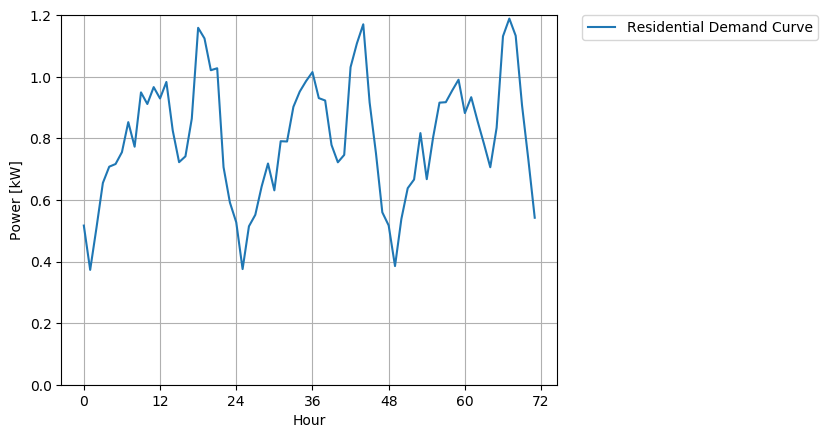

In [469]:
PVRes.capacity = 1.0
ts=simulate(residential, PVRes, 3);
plot(ts["demand_curve"], label = "Residential Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylim(0,1.2)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

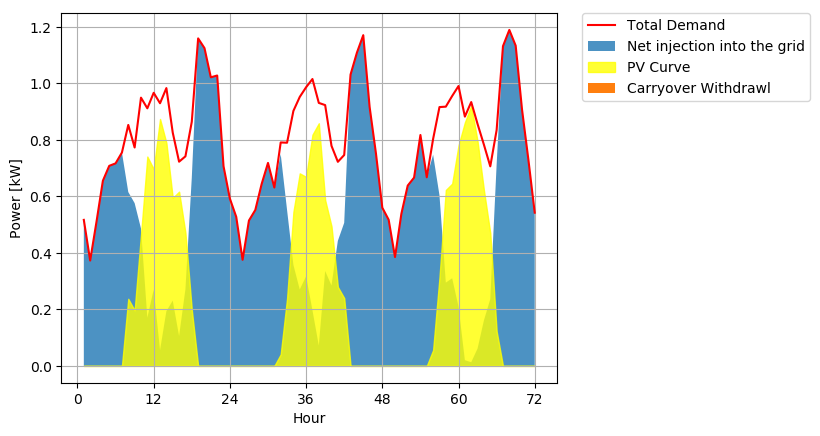

In [470]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 1

In [471]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | global_generation global_withdrawl global_allowance max_surplus carryover 
1 596.25 191.44  | 0.0 0.0 404.81  | 191.44 0.0 93.81 93.8 0.0 
2 595.2 131.59  | 0.0 0.0 463.61  | 323.03 0.0 158.28 158.28 0.0 
3 602.33 144.82  | 0.0 0.0 457.51  | 467.85 0.0 229.25 229.24 0.0 
4 591.62 167.99  | 0.0 0.0 423.63  | 635.84 0.0 311.56 311.56 0.0 
5 605.97 164.96  | 0.0 0.0 441.01  | 800.79 0.0 392.39 392.38 0.0 
6 609.24 178.36  | 0.0 0.0 430.87  | 979.15 0.0 479.78 479.78 0.0 
7 589.76 173.43  | 0.0 0.0 416.34  | 1152.58 0.0 564.76 564.76 0.0 
8 596.98 185.16  | 0.35 0.35 411.82  | 1337.74 0.35 655.49 655.14 0.0 
9 586.34 158.73  | 0.0 0.0 427.62  | 1496.47 0.35 733.27 732.92 0.0 
10 607.93 176.24  | 0.0 0.0 431.69  | 1672.71 0.35 819.63 819.28 0.0 
11 610.79 160.24  | 0.0 0.0 450.54  | 1832.95 0.35 898.15 897.8 0.0 
12 610.91 168.41  | 0.0 0.0 442.5  | 2001.36 0.35 980.67 980.32 0.0 


### Billings case residential 1

In [472]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost | counterfactual_cost savings
108999.36 0.08 126497.73  | 149168.1 22670.37
114888.25 0.0 133461.55  | 149044.41 15582.87
114277.42 0.0 132739.22  | 149888.63 17149.42
110884.11 0.0 128726.45  | 148619.79 19893.34
112625.1 0.0 130785.26  | 150319.39 19534.13
111609.65 0.0 129584.44  | 150706.16 21121.71
110153.94 0.0 127862.98  | 148400.17 20537.19
109701.61 7.3 127336.72  | 149254.79 21918.06
111283.51 0.0 129198.77  | 147995.44 18796.67
111690.97 0.0 129680.61  | 150551.3 20870.69
113579.54 0.0 131913.93  | 150890.01 18976.08
112773.99 0.0 130961.34  | 150904.33 19942.99


## Residential Case 2: Medium Size PV System, produces some injection into the grid 

In [473]:
PVRes.capacity = 2.0
ts=simulate(residential, PVRes, 3);

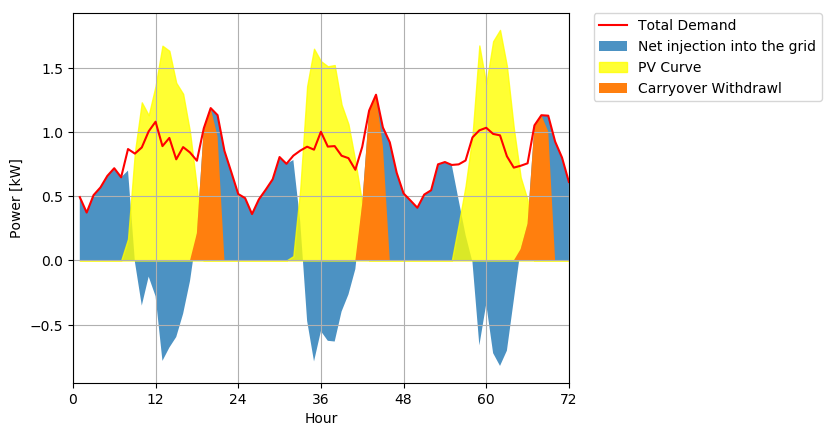

In [474]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
xlim(1,72)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 2

In [475]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | global_generation global_withdrawl global_allowance max_surplus carryover 
1 594.88 352.84  | 96.71 96.71 242.04  | 352.84 96.71 172.89 76.18 0.0 
2 594.3 284.48  | 49.41 49.41 309.82  | 637.32 146.12 312.29 166.16 0.0 
3 602.77 304.48  | 67.49 67.49 298.29  | 941.8 213.61 461.48 247.87 0.0 
4 591.67 313.8  | 68.38 68.38 277.88  | 1255.6 281.99 615.24 333.26 0.0 
5 605.56 343.6  | 79.65 79.65 261.97  | 1599.2 361.63 783.61 421.97 0.0 
6 608.32 319.51  | 63.21 63.21 288.8  | 1918.71 424.84 940.17 515.33 0.0 
7 589.47 337.39  | 93.79 93.79 252.08  | 2256.1 518.64 1105.49 586.85 0.0 
8 596.32 341.98  | 90.44 90.44 254.34  | 2598.08 609.08 1273.06 663.98 0.0 
9 587.59 364.75  | 107.79 107.79 222.85  | 2962.82 716.87 1451.78 734.92 0.0 
10 608.22 356.1  | 90.83 90.83 252.12  | 3318.92 807.7 1626.27 818.58 0.0 
11 609.6 339.45  | 85.23 85.23 270.16  | 3658.37 892.93 1792.6 899.67 0.0 
12 610.11 354.55  | 84.47 

### Billings case residential 2

In [476]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_cost | counterfactual_cost savings
73515.17 2033.87 87617.12  | 149006.01 61388.88
99487.42 1039.13 116480.04  | 148938.01 32457.97
78964.76 1419.26 93340.05  | 149940.93 56600.88
76986.86 1437.96 91020.89  | 148626.31 57605.42
75445.68 1674.97 89477.25  | 150271.51 60794.26
78045.38 1329.24 92145.13  | 150597.25 58452.12
74488.04 1972.48 88696.05  | 148365.7 59669.66
74706.85 1901.95 88871.52  | 149176.54 60305.02
71656.04 2266.9 85692.42  | 148143.03 62450.6
74491.48 1910.1 88626.24  | 150585.55 61959.31
76239.06 1792.42 90555.52  | 150749.88 60194.36
74824.73 1776.35 88862.3  | 150809.56 61947.26


## Residential Case 3: Large PV System that generates multi-day carry over

In [477]:
PVRes.capacity = 4.0
ts=simulate(residential, PVRes, 3);

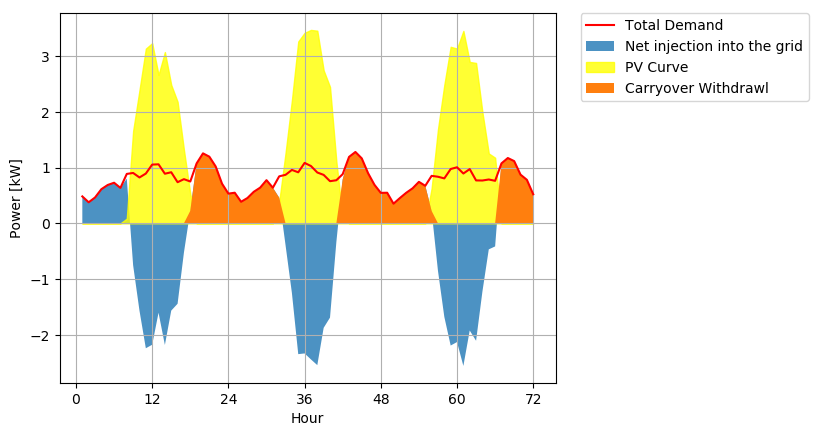

In [478]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 3

In [479]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | global_generation global_withdrawl global_allowance max_surplus carryover 
1 594.97 751.6  | 472.44 315.81 0.0  | 751.6 315.81 368.29 52.48 52.48 
2 593.82 556.86  | 292.54 329.5 0.0  | 1308.47 645.3 641.15 0.0 0.0 
3 603.93 635.38  | 370.25 338.8 0.0  | 1943.84 984.1 952.48 0.0 0.0 
4 592.67 701.92  | 425.53 316.28 0.0  | 2645.76 1300.38 1296.42 0.0 0.0 
5 605.31 686.78  | 398.18 316.71 0.0  | 3332.54 1617.09 1632.94 15.85 15.85 
6 605.46 650.39  | 381.53 336.61 0.0  | 3982.92 1953.7 1951.63 0.0 0.0 
7 589.73 697.59  | 430.03 322.16 0.0  | 4680.52 2275.86 2293.45 17.59 17.59 
8 598.72 723.34  | 439.47 314.85 0.0  | 5403.86 2590.71 2647.89 57.18 57.18 
9 584.35 718.77  | 432.81 298.38 0.0  | 6122.63 2889.09 3000.09 111.0 111.0 
10 610.4 678.19  | 409.77 341.98 0.0  | 6800.82 3231.07 3332.4 101.33 101.33 
11 612.56 619.65  | 350.78 343.69 0.0  | 7420.48 3574.76 3636.03 61.27 61.27 
12 610.63 710.3  | 427.3

### Billings case residential 3

In [480]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost | counterfactual_cost savings
0.0 6641.42 7866.13  | 149017.22 141151.1
0.0 6929.32 8207.12  | 148880.29 140673.18
0.0 7124.89 8438.75  | 150077.37 141638.62
0.0 6651.35 7877.89  | 148744.05 140866.16
0.0 6660.44 7888.65  | 150240.96 142352.31
0.0 7078.81 8384.18  | 150258.95 141874.77
0.0 6775.08 8024.43  | 148395.9 140371.47
0.0 6621.28 7842.28  | 149461.55 141619.27
0.0 6275.03 7432.17  | 147758.98 140326.81
0.0 7191.84 8518.05  | 150843.98 142325.93
0.0 7227.82 8560.66  | 151100.05 142539.39
0.0 6890.33 8160.93  | 150871.71 142710.77


# Commercial consumer subject to commercial and small size industrial tariff cases

## Commercial case1: small PV system

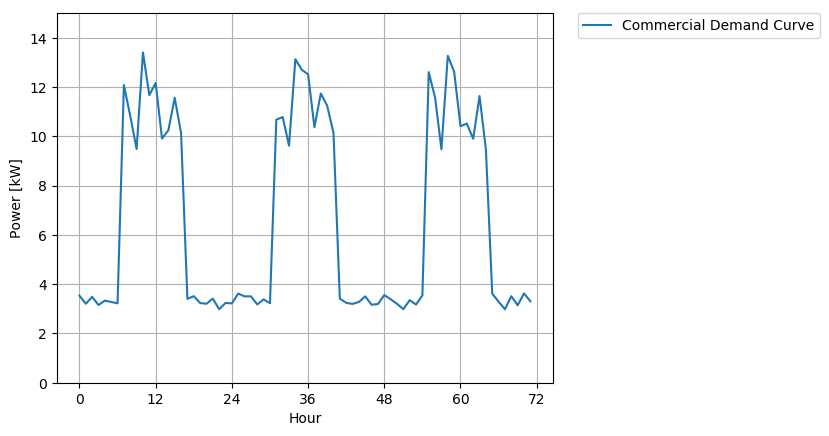

In [481]:
ts=simulate(commercial, PVComInd, 3);
plot(ts["demand_curve"], label = "Commercial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylim(0,15)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [482]:
mean(commercial.peak_power)

13.847359136480511

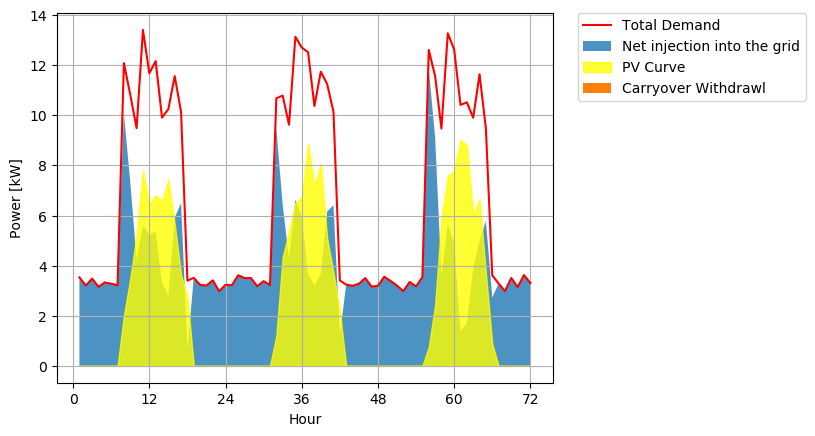

In [483]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [484]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus carry_over 
1 4963.57 1882.27  | 0.0 0.0 3081.29  | 14.91 9.11  | 1882.27 0.0 922.31 922.31 0.0 
2 5111.58 1295.17  | 0.0 0.0 3816.41  | 16.84 12.64  | 3177.44 0.0 1556.95 1556.95 0.0 
3 4834.37 1546.75  | 0.0 0.0 3287.62  | 14.39 10.76  | 4724.19 0.0 2314.85 2314.85 0.0 
4 5031.36 1731.76  | 0.0 0.0 3299.59  | 15.44 10.68  | 6455.96 0.0 3163.42 3163.42 0.0 
5 5328.05 1722.48  | 0.0 0.0 3605.57  | 15.97 10.17  | 8178.44 0.0 4007.43 4007.43 0.0 
6 5196.29 1677.0  | 0.0 0.0 3519.29  | 16.02 11.33  | 9855.43 0.0 4829.16 4829.16 0.0 
7 4973.45 1697.56  | 0.0 0.0 3275.89  | 14.74 9.85  | 11552.99 0.0 5660.97 5660.97 0.0 
8 5009.9 1738.59  | 0.0 0.0 3271.31  | 14.84 9.81  | 13291.58 0.0 6512.88 6512.88 0.0 
9 4916.7 1684.85  | 0.0 0.0 3231.85  | 15.19 10.12  | 14976.43 0.0 7338.45 7338.45 0.0 
10 4761.57 1754.19  | 0.0 0.0

In [485]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
197880.54 0.0 197880.54 91609.86  | 318760.23 149852.87 468613.1  | 217217.4
245089.83 0.0 245089.83 127096.1  | 328265.6 169257.77 497523.37  | 184140.52
211131.02 0.0 211131.02 108219.41  | 310463.22 144709.9 455173.12  | 185398.36
211899.83 0.0 211899.83 107360.83  | 323113.76 155231.56 478345.32  | 207772.97
231549.53 0.0 231549.53 102261.26  | 342167.21 160520.63 502687.84  | 209245.68
226008.77 0.0 226008.77 113877.38  | 333705.53 161072.19 494777.72  | 206283.03
210377.74 0.0 210377.74 99024.84  | 319395.0 148234.77 467629.78  | 200116.78
210083.71 0.0 210083.71 98621.84  | 321735.88 149236.57 470972.45  | 203872.36
207549.19 0.0 207549.19 101721.27  | 315750.39 152673.45 468423.84  | 203913.47
193134.4 0.0 193134.4 97834.02  | 305788.19 142283.74 448071.93  | 201463.77
214600.79 0.0 214600.79 97804.94  | 318574.46 153615.4

## Commercial case 2: medium PV system

In [486]:
PVComInd.capacity = 21.0
ts=simulate(commercial, PVComInd, 3);

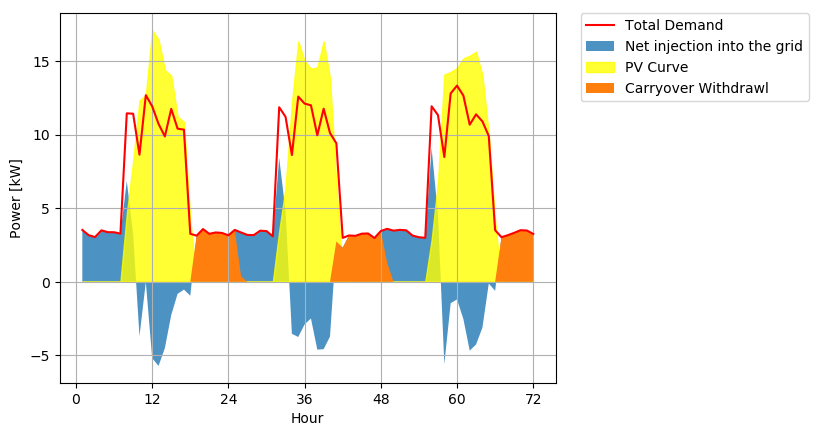

In [487]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [488]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus carry_over 
1 4987.71 3949.07  | 693.68 693.68 1038.63  | 14.82 7.99  | 3949.07 693.68 1935.05 1241.37 0.0 
2 5095.93 2747.19  | 71.28 71.28 2348.74  | 16.87 12.61  | 6696.26 764.96 3281.17 2516.21 0.0 
3 4860.65 2995.43  | 327.79 327.79 1865.21  | 14.42 10.81  | 9691.7 1092.75 4748.93 3656.18 0.0 
4 5003.74 3417.57  | 360.85 360.85 1586.17  | 15.39 7.4  | 13109.26 1453.6 6423.54 4969.94 0.0 
5 5335.46 3728.01  | 455.85 455.85 1607.45  | 15.85 10.69  | 16837.27 1909.44 8250.26 6340.82 0.0 
6 5202.11 3667.73  | 509.5 509.5 1534.38  | 15.91 6.93  | 20505.0 2418.94 10047.45 7628.51 0.0 
7 4966.31 3508.94  | 433.78 433.78 1457.37  | 14.65 7.02  | 24013.95 2852.72 11766.83 8914.11 0.0 
8 5006.61 3668.36  | 610.81 610.81 1338.25  | 14.96 10.5  | 27682.31 3463.53 13564.33 10100.8 0.0 
9 4913.44 3486.91  | 526.04 526.04 1426

In [489]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
110801.41 14588.08 125389.49 0.0  | 320310.57 148998.5 469309.08  | 321240.67
250563.41 1499.09 252062.51 0.0  | 327260.39 169620.35 496880.73  | 199339.61
198980.86 6893.34 205874.2 0.0  | 312150.74 145009.34 457160.08  | 214118.14
169212.8 7588.68 176801.47 0.0  | 321340.19 154712.45 476052.65  | 267325.44
171483.3 9586.43 181069.73 0.0  | 342643.45 159349.51 501992.96  | 288219.5
163687.92 10714.69 174402.61 0.0  | 334079.64 159961.78 494041.42  | 288133.32
155472.49 9122.45 164594.93 0.0  | 318936.73 147319.78 466256.51  | 271931.79
142764.18 12845.33 155609.51 0.0  | 321524.57 150383.86 471908.43  | 288175.22
152181.7 11062.59 163244.29 0.0  | 315541.11 150414.24 465955.35  | 273217.16
134425.1 11729.47 146154.56 0.0  | 303765.62 141866.2 445631.82  | 273063.71
167818.97 8677.3 176496.28 0.0  | 317403.56 153275.98 470679.53  

## Commercial case 3: Large PV system

In [490]:
PVComInd.capacity = 32.0
ts=simulate(commercial, PVComInd, 3);

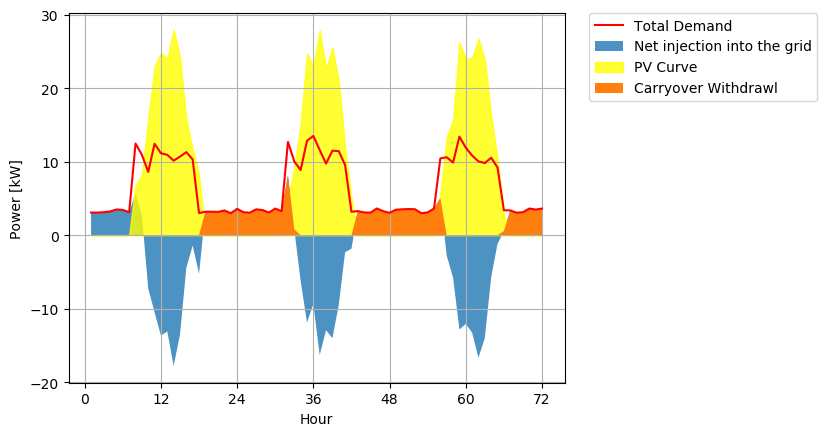

In [491]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [492]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus carry_over 
1 4957.44 6061.25  | 2628.29 1524.48 0.0  | 14.67 6.3  | 6061.25 1524.48 2970.01 1445.53 1103.8 
2 5111.55 4600.02  | 1545.69 2057.22 0.0  | 16.87 12.6  | 10661.27 3581.71 5224.02 1642.31 592.28 
3 4846.92 4392.05  | 1497.46 1952.33 0.0  | 14.23 10.77  | 15053.31 5534.03 7376.12 1842.09 137.4 
4 5020.59 5513.41  | 2178.19 1685.37 0.0  | 15.43 9.37  | 20566.73 7219.4 10077.7 2858.3 630.23 
5 5354.61 5593.83  | 2134.14 1894.92 0.0  | 15.94 6.35  | 26160.56 9114.32 12818.67 3704.35 869.45 
6 5206.19 5565.38  | 2124.42 1765.23 0.0  | 16.01 6.73  | 31725.93 10879.55 15545.71 4666.15 1228.63 
7 4967.68 5668.3  | 2287.73 1587.1 0.0  | 14.79 6.2  | 37394.23 12466.66 18323.17 5856.52 1929.26 
8 5018.13 5636.65  | 2289.64 1671.12 0.0  | 14.96 7.53  | 43030.88 14137.78 21085.13 6947.36 2547.77 
9 4932.95 5084.95  | 

In [493]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
0.0 32059.89 32059.89 0.0  | 318367.12 147486.35 465853.47  | 427881.59
0.0 43263.38 43263.38 0.0  | 328263.42 169586.06 497849.48  | 446608.14
0.0 41057.46 41057.46 0.0  | 311269.33 143047.66 454317.0  | 405688.36
0.0 35443.27 35443.27 0.0  | 322422.29 155116.62 477538.92  | 435559.75
0.0 39850.11 39850.11 0.0  | 343872.99 160232.68 504105.67  | 456907.02
0.0 37122.87 37122.87 0.0  | 334341.37 160986.64 495328.01  | 451359.52
0.0 33376.81 33376.81 0.0  | 319024.19 148738.42 467762.61  | 428230.97
0.0 35143.64 35143.64 0.0  | 322264.51 150428.95 472693.46  | 431069.18
0.0 34578.57 34578.57 0.0  | 316794.23 152319.41 469113.65  | 428158.64
0.0 29273.72 29273.72 0.0  | 305842.78 141182.39 447025.17  | 412353.25
0.0 33728.06 33728.06 0.0  | 317999.57 153389.91 471389.48  | 431441.82
0.0 30589.83 30589.83 0.0  | 311518.95 144744.4 456

# Medium Voltage (TMT) cases, users are medium to large industrial consumers.

## TMT case 1: small PV system

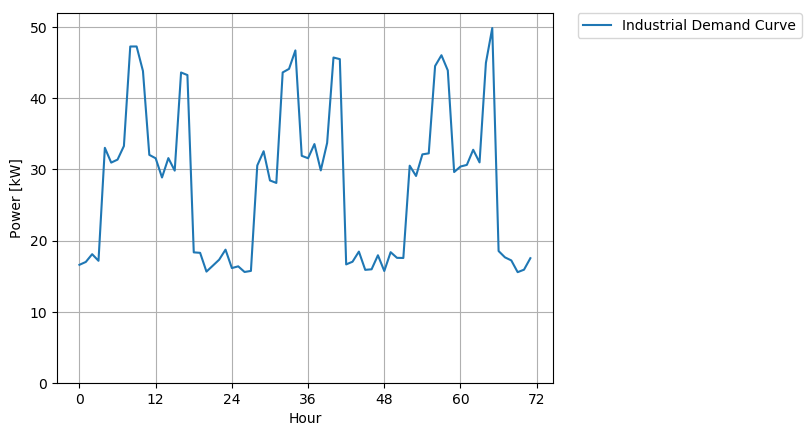

In [494]:
ts=simulate(mediumvoltage, PVTMT, 3);
plot(ts["demand_curve"], label = "Industrial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ylim(0,52)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

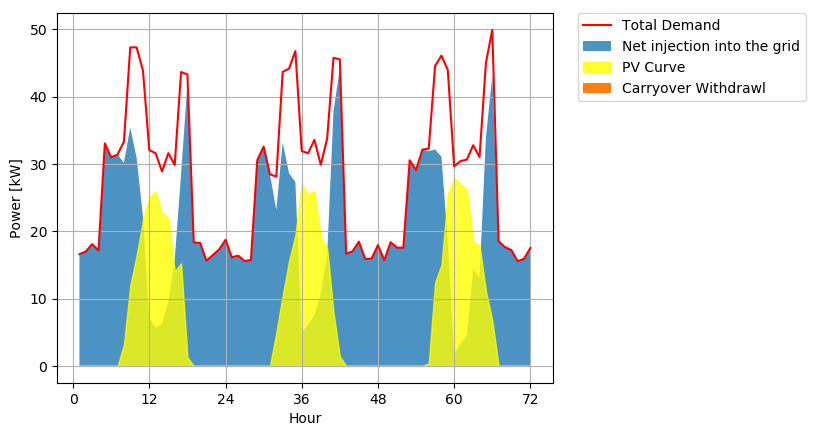

In [495]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [496]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus carry_over
1 | 7215.75 8098.95 5752.28  | 6296.57 0.0 0.0  | 4637.21 4380.91 5752.28  | 50.72 50.34 33.35  | 50.54 33.75 33.35  | 6296.57 0.0 3085.32 3085.32 0.0 
2 | 6602.81 7481.62 5263.51  | 4293.27 0.0 0.0  | 4761.16 5030.0 5263.51  | 51.57 50.91 34.45  | 51.33 34.41 34.45  | 10589.84 0.0 5189.02 5189.02 0.0 
3 | 7251.18 8108.4 5757.82  | 4314.65 0.0 0.0  | 5229.45 5815.48 5757.82  | 50.71 50.69 33.8  | 50.71 35.44 33.8  | 14904.48 0.0 7303.2 7303.2 0.0 
4 | 7471.85 8458.49 5944.61  | 5349.85 0.0 0.0  | 5196.5 5383.99 5944.61  | 54.33 54.28 36.03  | 54.33 36.24 36.03  | 20254.33 0.0 9924.62 9924.62 0.0 
5 | 7207.54 8128.76 5691.98  | 

In [497]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
252357.19 119204.59 112687.13  | 0.0  | 392681.11 220372.3 112687.13  | 482292.6 229164.6 143748.75  | 483965.08 341810.1 143748.75  | 430392.48 
259102.32 136866.42 103112.22  | 0.0  | 359324.78 203574.99 103112.22  | 489823.09 233616.77 148477.1  | 492079.52 345650.73 148477.1  | 337770.94 
284586.62 158239.23 112795.73  | 0.0  | 394609.16 220629.46 112795.73  | 483918.37 240670.93 145678.75  | 483918.37 344170.47 145678.75  | 331753.78 
282793.39 146498.32 116454.98  | 0.0  | 406617.86 230155.49 116454.98  | 518484.96 246049.02 155291.05  | 518484.96 368570.03 155291.05  | 397456.0 
284854.7 134334.86 1

## TMT Case2: Medium PV System

In [498]:
PVTMT.capacity = 75
ts=simulate(mediumvoltage, PVTMT, 3);

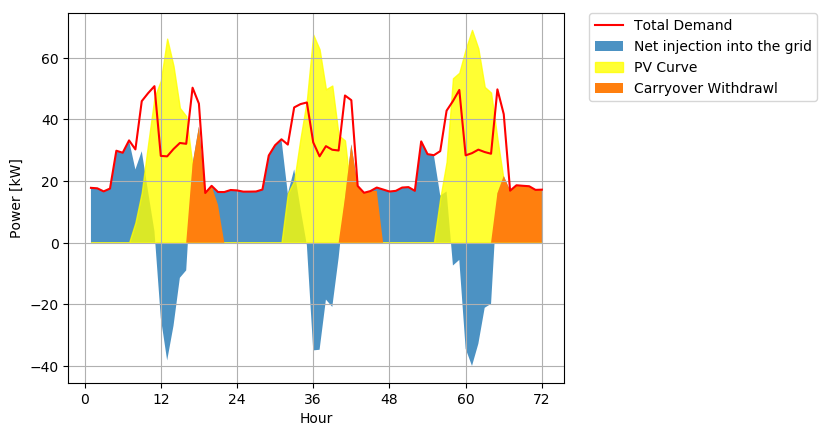

In [499]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [500]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus carry_over
1 | 7244.17 8172.21 5722.84  | 13094.71 3109.1 3109.1  | 184.11 2170.52 5689.88  | 50.76 50.79 33.06  | 50.65 33.64 33.06  | 13094.71 3109.1 6416.41 3307.3 0.0 
2 | 6657.63 7477.76 5264.32  | 10500.96 1724.46 1724.46  | 1878.24 1756.19 5264.32  | 51.65 51.35 33.66  | 51.65 33.73 33.66  | 23595.67 4833.57 11561.88 6728.31 0.0 
3 | 7186.9 8125.17 5737.42  | 11294.87 2012.24 2012.24  | 2535.54 1481.66 5737.42  | 50.3 50.83 33.82  | 49.89 33.84 33.82  | 34890.53 6845.8 17096.36 10250.56 0.0 
4 | 7461.15 8402.39 5913.52  | 12626.96 2361.44 2361.44  | 1148.93 2087.65 5913.52  | 54.24 54.27 36.15  | 54.24 36.14 36.15  | 47517.49 9207.

In [501]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
10019.14 59059.98 111464.73  | 65384.42  | 394227.58 222365.77 112110.48  | 483373.32 228410.68 142512.08  | 484378.99 344862.92 142512.08  | 786788.82 
102213.6 47785.88 103128.02  | 36265.48  | 362308.0 203469.81 103128.02  | 492840.14 229049.62 145080.0  | 492840.14 348676.82 145080.0  | 638495.85 
137984.22 40315.93 112396.06  | 42317.32  | 391111.29 221085.76 112396.06  | 476080.24 229779.71 145756.98  | 480034.23 345146.75 145756.98  | 659596.13 
62524.86 56804.97 115845.88  | 49661.17  | 406035.6 228629.1 115845.88  | 517632.77 245377.31 155836.98  | 517632.77 368525.2 155836.98  | 759533.18 
48674.

## TMT Case 3: Large PV System

In [502]:
PVTMT.capacity = 150
ts=simulate(mediumvoltage, PVTMT, 3);

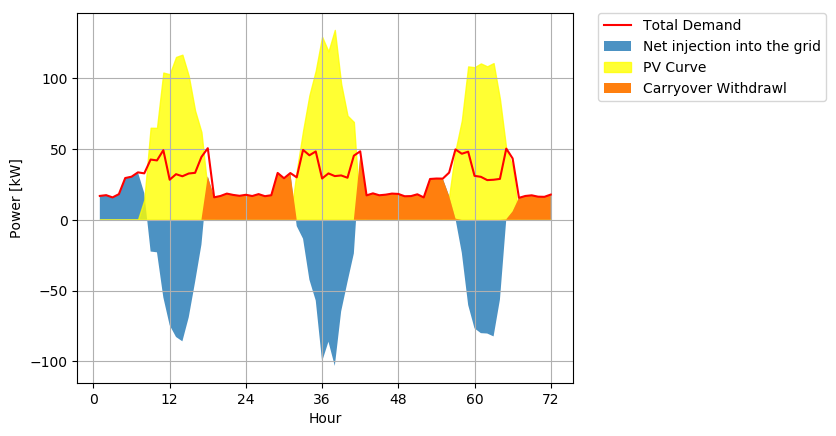

In [503]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [504]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus carry_over
1 | 7172.97 8086.45 5719.48  | 28933.75 17549.26 9594.41  | 0.0 45.54 0.0  | 50.8 50.8 33.83  | 50.8 33.84 33.83  | 28933.75 9594.41 14177.54 4583.13 4583.13 
2 | 6554.32 7443.27 5265.92  | 19672.9 10681.8 10272.41  | 0.0 0.0 0.0  | 51.64 51.21 33.9  | 51.64 34.26 33.9  | 48606.65 19866.82 23817.26 3950.44 3950.44 
3 | 7172.51 8152.33 5745.02  | 22166.67 11352.6 10255.78  | 0.0 0.0 0.0  | 50.76 50.65 33.67  | 50.4 33.86 33.67  | 70773.32 30122.6 34678.93 4556.33 4556.33 
4 | 7445.86 8441.31 5925.81  | 25441.36 13935.88 10307.5  | 0.0 0.0 0.0  | 54.36 54.38 36.17  | 54.15 36.23 36.17  | 96214.68 40430.1 47145.19 6715.09 6715.09 

In [505]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
0.0 1239.07 0.0  | 201770.38  | 390353.27 220032.19 112044.62  | 484734.18 229791.53 145815.34  | 484734.18 344926.89 145815.34  | 962276.88 
0.0 0.0 0.0  | 216028.83  | 356686.09 202531.45 103159.36  | 492743.96 232611.52 146131.25  | 492743.96 347747.94 146131.25  | 883918.62 
0.0 0.0 0.0  | 215679.11  | 390327.73 221824.77 112544.98  | 480959.24 229899.02 145121.0  | 484346.85 343894.78 145121.0  | 964472.98 
0.0 0.0 0.0  | 216766.75  | 405203.69 229688.05 116086.54  | 516707.68 246029.08 155901.33  | 518782.55 369249.53 155901.33  | 1.00593542e6 
0.0 0.0 0.0  | 190031.0  | 392720.76 220362.23 112074.54